# 1. Solving a Simple Linear Regression Model Analytically with a Mock Dataset

### About this notebook

This notebook was used in the 50.039 Deep Learning course at the Singapore University of Technology and Design.

**Author:** Matthieu DE MARI (matthieu_demari@sutd.edu.sg)

**Version:** 1.0 (25/11/2022)

**Requirements:**
- Python 3 (tested on v3.9.6)
- Matplotlib (tested on v3.5.1)
- Numpy (tested on v1.22.1)

### Imports

In [1]:
# Matplotlib
import matplotlib.pyplot as plt
# Numpy
import numpy as np

### Mock dataset generation

We will create a dataset, which uses surfaces as inputs, with values drawn randomly between **min_surf** = 40 sqm and **max_surf** = 150 sqm values.

We will also use four helper functions: **surface()**, **price()**, **get_x_list()** and **get_y_list()**.
- The **surface()** function randomly generates a surface values between **min_surf** = 40 sqm and **max_surf** = 150 sqm, and rounds it to two decimals.
- The **price()** function randomly generates a price for a given surface passed as inputs. We will assume that the price is randomly generated, using a uniform distribution, with average 100000 + 14373 times the surface in sqm, and a "variance" of +/- 10% around the average value. Note that the function will first calculate the price in SGD, but will return a value corresponding to the price in millions of SGD.
- The last two helper functions, **get_x_list()** and **get_y_list()**, will help split the dataset in two lists of equal lengths, separating inputs from outputs.

Eventually, using these four helper functions, we can obtain two list of **n_points** elements:
- The first one, **inputs**, contains **n_points** values, corresponding to surface values drawn randomly between *min_surf* and *max_surf* values.
- The second one, **outputs**, contains **n_points** values, corresponding to price values drawn randomly, assuming that the price is 14373 times the surface in sqm, +/- 10%.

In [2]:
# Two random generator functions to generate a mock dataset.
# 1. Surfaces randomly generated as uniform between 40sqm and 150sqm.
min_surf = 40
max_surf = 150
def surface(min_surf, max_surf):
    return round(np.random.uniform(min_surf, max_surf), 2)

In [3]:
# 2. Price is 100000 + 14373 times the surface in sqm, +/- 10%
# (randomly decided to give the dataset some diversity).
def price(surface):
    # Note: this will return the price in millions of SGD.
    return round((100000 + 14373*surface)*(1 + np.random.uniform(-0.1, 0.1)))/1000000

In [4]:
# 3. Two helper functions to split the dataset
# in list of x and y values.
def get_x_list(l):
    return [v[0] for v in l]
def get_y_list(l):
    return [v[1] for v in l]

In [5]:
# Dataset generation (n_points points will be generated).
# We will use a seed for reproducibility.
np.random.seed(47)
n_points = 50
dataset = [(s := surface(min_surf, max_surf), price(s)) for _ in range(n_points)]
print(dataset)

[(52.48, 0.935365), (120.16, 1.772784), (117.84, 1.901195), (111.01, 1.666587), (117.66, 1.700371), (68.16, 0.976882), (50.86, 0.797843), (110.49, 1.628048), (60.4, 1.048909), (69.8, 1.053269), (144.99, 2.021069), (122.2, 1.672687), (134.25, 2.109117), (100.83, 1.684086), (96.39, 1.389638), (99.06, 1.460845), (41.17, 0.744834), (112.21, 1.864293), (121.94, 1.766388), (79.8, 1.25355), (100.16, 1.465289), (59.21, 0.924532), (55.42, 0.876662), (91.91, 1.554265), (56.01, 0.907612), (98.04, 1.450346), (57.56, 0.945283), (51.41, 0.850319), (82.49, 1.17885), (101.82, 1.60976), (112.81, 1.61443), (144.95, 1.990804), (136.82, 2.183792), (67.77, 1.165802), (88.92, 1.344189), (138.32, 2.19417), (125.19, 2.043345), (92.96, 1.379503), (88.72, 1.38291), (106.9, 1.644736), (147.58, 2.266497), (131.88, 1.830034), (93.71, 1.562736), (140.88, 2.004551), (84.07, 1.320158), (110.61, 1.680886), (101.99, 1.593864), (74.49, 1.231054), (134.29, 2.020608), (134.95, 2.105278)]


In [6]:
# Separate inputs and outputs
inputs = get_x_list(dataset)
outputs = get_y_list(dataset)
print(inputs)
print(outputs)

[52.48, 120.16, 117.84, 111.01, 117.66, 68.16, 50.86, 110.49, 60.4, 69.8, 144.99, 122.2, 134.25, 100.83, 96.39, 99.06, 41.17, 112.21, 121.94, 79.8, 100.16, 59.21, 55.42, 91.91, 56.01, 98.04, 57.56, 51.41, 82.49, 101.82, 112.81, 144.95, 136.82, 67.77, 88.92, 138.32, 125.19, 92.96, 88.72, 106.9, 147.58, 131.88, 93.71, 140.88, 84.07, 110.61, 101.99, 74.49, 134.29, 134.95]
[0.935365, 1.772784, 1.901195, 1.666587, 1.700371, 0.976882, 0.797843, 1.628048, 1.048909, 1.053269, 2.021069, 1.672687, 2.109117, 1.684086, 1.389638, 1.460845, 0.744834, 1.864293, 1.766388, 1.25355, 1.465289, 0.924532, 0.876662, 1.554265, 0.907612, 1.450346, 0.945283, 0.850319, 1.17885, 1.60976, 1.61443, 1.990804, 2.183792, 1.165802, 1.344189, 2.19417, 2.043345, 1.379503, 1.38291, 1.644736, 2.266497, 1.830034, 1.562736, 2.004551, 1.320158, 1.680886, 1.593864, 1.231054, 2.020608, 2.105278]


We can then use matplotlib to display the dataset and see that there is a clear linear trend in this dataset, as expected.

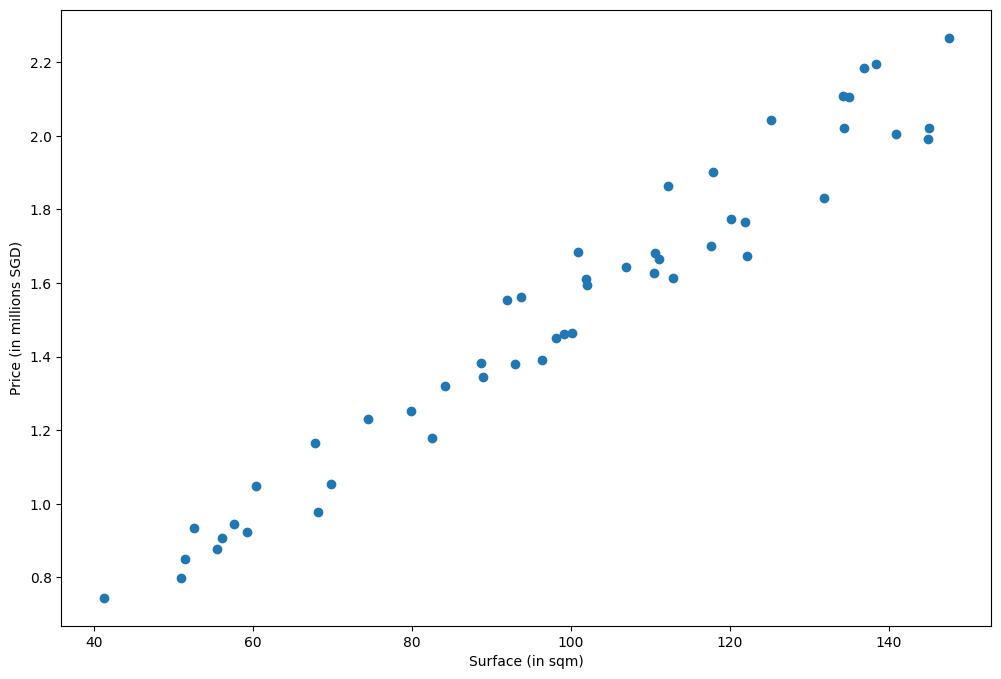

In [7]:
# Display dataset and see that there is a rather clear linear trend.
plt.figure(figsize = (12, 8))
plt.scatter(inputs, outputs)
plt.xlabel("Surface (in sqm)")
plt.ylabel("Price (in millions SGD)")
plt.show()

### Linear Regression

Linear regression is a model, which assumes that there is a linear relationship between inputs $ x $ and outputs $ y $. It therefore consists of two parameters $ (a, b) $, to be chosen, which will connect any input $ x_i $ to its respective output $ y_i $, with the equation:

$$ y_i \approx a x_i + b $$

Below, we define the **linreg()** function, which produces a list of values to be used for display later, to represent the linear function $ f(x) = ax + b $ in matplotlib, for any parameters a and b.

In [8]:
# Linear regression has two trainable parameters (a and b).
# Other parameters, like min_surf, max_surf, n_points will
# help get points for the upcoming matplotlib displays.
def linreg(a, b, min_surf, max_surf, n_points = 50):
    return [(x, a*x + b) for x in np.linspace(min_surf, max_surf, n_points)]

Below, we define three linear regression models, with parameters:
- $ a = 25000/1000000 $ and $ b = 0 $ for model1 (to be displayed in red),
- $ a = 17000/1000000 $ and $ b = 50000/1000000 $ for model2 (to be displayed in green),
- and $ a = 14500/1000000 $ and $ b = 95000/1000000 $ for model3 (to be displayed in black).

We can observe that the green model is pretty bad at fitting the data, the green one is slightly better and the black one is the closest fit. This is expected as the parameters a and b become closer and closer to the ones used in the **price()** fucntion, earlier, that is 100000 + 14373 times the surface in sqm.

Note that we divide by 1000000, to display the price in millions SGD in matplotlib.

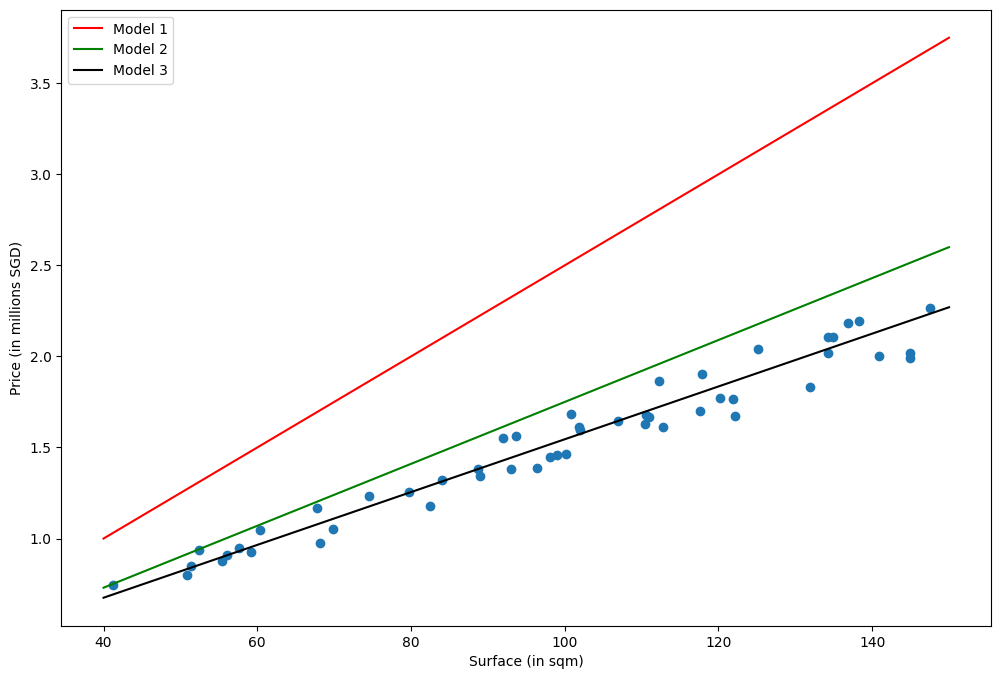

In [9]:
# Display dataset
plt.figure(figsize = (12, 8))
plt.scatter(inputs, outputs)
plt.xlabel("Surface (in sqm)")
plt.ylabel("Price (in millions SGD)")

# Add some linreg (model 1)
a1 = 25000/1000000
b1 = 0
linreg_dataset1 = linreg(a1, b1, min_surf, max_surf, n_points)
plt.plot(get_x_list(linreg_dataset1), get_y_list(linreg_dataset1), 'r', label = "Model 1")

# Another linreg (model 2)
a2 = 17000/1000000
b2 = 50000/1000000
linreg_dataset2 = linreg(a2, b2, min_surf, max_surf, n_points)
plt.plot(get_x_list(linreg_dataset2), get_y_list(linreg_dataset2), 'g', label = "Model 2")

# A final linreg (model 3)
a3 = 14500/1000000
b3 = 95000/1000000
linreg_dataset3 = linreg(a3, b3, min_surf, max_surf, n_points)
plt.plot(get_x_list(linreg_dataset3), get_y_list(linreg_dataset3), 'k', label = "Model 3")

# Display
plt.legend(loc = 'best')
plt.show()

### Loss function

In order to measure the quality of the fit for each model, and evaluate whether the parameters $ (a, b) $ used for the linear regression are good choices or not, we will use a loss function, namely the mean square error  $ L(a, b, x, y) $:

$$ L(a, b, x, y) = \frac{1}{N} \sum_{i=1}^N \left((a x_i + b) - y_i\right)^2 $$

With $ N $ being the number of points in the dataset (i.e. the value in the variable *n_points*).

As a rule of thumb, the lower the value of this loss function, the better the model fits the data.

We implement the loss function below, as the function **loss_mse()**.

In [10]:
# Mean square error as a loss function
# Displaying loss using exponential notation (XXXe-YYY)
def loss_mse(a, b, x, y):
    val =  sum([(y_i - (a*x_i + b))**2 for x_i, y_i in zip(x, y)])/len(x)
    return '{:.2e}'.format(val)

In [11]:
# The lower the loss function, the better the linear regression values (a, b) fit the dataset.
loss1 = loss_mse(a1, b1, inputs, outputs)
loss2 = loss_mse(a2, b2, inputs, outputs)
loss3 = loss_mse(a3, b3, inputs, outputs)
print(loss1, loss2, loss3)

1.03e+00 6.26e-02 8.29e-03


Below, we provide a full display with dataset entries, the three linear regressions and their loss values.

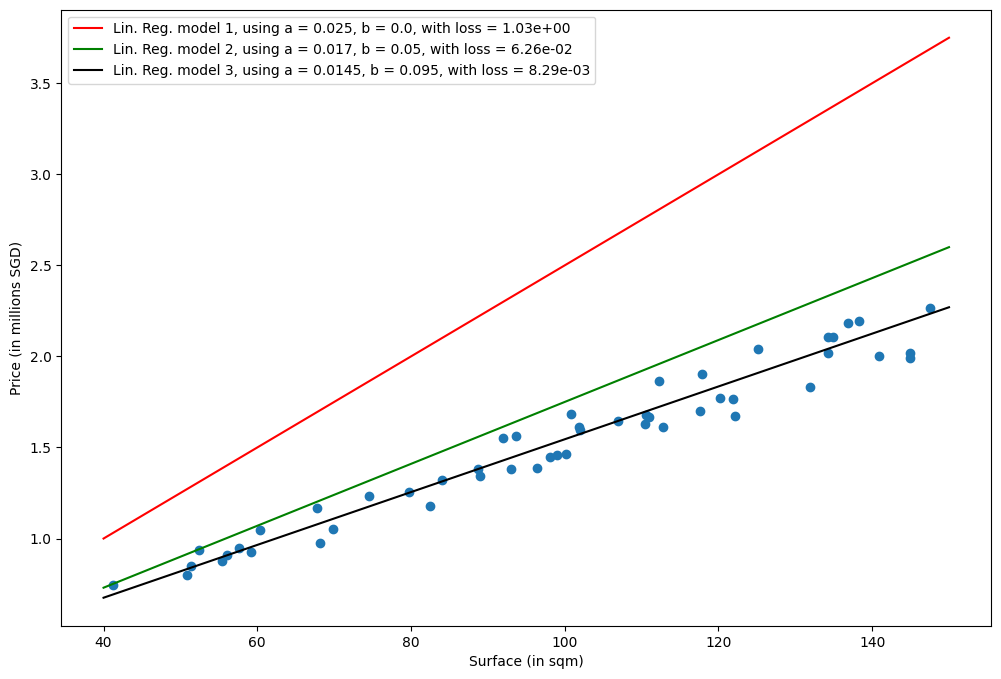

In [12]:
# Display dataset
plt.figure(figsize = (12, 8))
plt.scatter(inputs, outputs)
plt.xlabel("Surface (in sqm)")
plt.ylabel("Price (in millions SGD)")

# Add some linreg
a1 = 25000/1000000
b1 = 0/1000000
linreg_dataset1 = linreg(a1, b1, min_surf, max_surf, n_points)
loss1 = loss_mse(a1, b1, inputs, outputs)
legend1 = "Lin. Reg. model 1, using a = {}, b = {}, with loss = {}".format(a1, b1, loss1)
plt.plot(get_x_list(linreg_dataset1), get_y_list(linreg_dataset1), 'r', label = legend1)

# Another linreg
a2 = 17000/1000000
b2 = 50000/1000000
linreg_dataset2 = linreg(a2, b2, min_surf, max_surf, n_points)
loss2 = loss_mse(a2, b2, inputs, outputs)
legend2 = "Lin. Reg. model 2, using a = {}, b = {}, with loss = {}".format(a2, b2, loss2)
plt.plot(get_x_list(linreg_dataset2), get_y_list(linreg_dataset2), 'g', label = legend2)

# A final linreg
a3 = 14500/1000000
b3 = 95000/1000000
linreg_dataset3 = linreg(a3, b3, min_surf, max_surf, n_points)
loss3 = loss_mse(a3, b3, inputs, outputs)
legend3 = "Lin. Reg. model 3, using a = {}, b = {}, with loss = {}".format(a3, b3, loss3)
plt.plot(get_x_list(linreg_dataset3), get_y_list(linreg_dataset3), 'k', label = legend3)

# Display
plt.legend(loc = 'best')
plt.show()

### Finding the optimal linear regression parameters, analytically

The best values $ (a^* , b^*) $ to be used for $ (a, b) $ can be found by solving the following optimization problem.

For any dataset of given inputs $ x = (x_i)_{i \in \{1, 2, ..., N\}} $ and outputs $ y = (y_i)_{i \in \{1, 2, ..., N\}} $, the best values $ (a^* , b^*) $ are defined as:

$$ (a^* , b^*) = \arg\min_{(a, b)} \left[ L(a, b, x, y) \right] $$

Or, equivalently:

$$ (a^* , b^*) = \arg\min_{(a, b)} \left[ \frac{1}{N} \sum_{i=1}^N \left((a x_i + b) - y_i\right)^2 \right] $$

Let us define the matrix notations, below:

$$ W = \begin{pmatrix} b \\ a \end{pmatrix}, $$

$$ X = \begin{pmatrix} 1 & x_1 \\ 1 & x_2 \\ \vdots & \vdots \\ 1 & x_N \end{pmatrix}, $$

$$ Y = \begin{pmatrix} y_1 \\ y_2 \\ \vdots \\ y_N \end{pmatrix}, $$

Using these notations, we can prove that the optimal values $ (a^*, b^*) $, or equivalently $ W^* $, can be calculated as

$$ W^* = (X^T X)^{-1} X^T Y $$

(**Proof:** is out of scope, but for those of you who are curious, have a look at these lectures notes, https://people.cs.pitt.edu/~milos/courses/cs2750-Spring03/lectures/class6.pdf.)

In [13]:
# Defining the X matrix, following the notation above, as a numpy array.
X = np.array([[1, x_i] for x_i in inputs])
print(X)

[[  1.    52.48]
 [  1.   120.16]
 [  1.   117.84]
 [  1.   111.01]
 [  1.   117.66]
 [  1.    68.16]
 [  1.    50.86]
 [  1.   110.49]
 [  1.    60.4 ]
 [  1.    69.8 ]
 [  1.   144.99]
 [  1.   122.2 ]
 [  1.   134.25]
 [  1.   100.83]
 [  1.    96.39]
 [  1.    99.06]
 [  1.    41.17]
 [  1.   112.21]
 [  1.   121.94]
 [  1.    79.8 ]
 [  1.   100.16]
 [  1.    59.21]
 [  1.    55.42]
 [  1.    91.91]
 [  1.    56.01]
 [  1.    98.04]
 [  1.    57.56]
 [  1.    51.41]
 [  1.    82.49]
 [  1.   101.82]
 [  1.   112.81]
 [  1.   144.95]
 [  1.   136.82]
 [  1.    67.77]
 [  1.    88.92]
 [  1.   138.32]
 [  1.   125.19]
 [  1.    92.96]
 [  1.    88.72]
 [  1.   106.9 ]
 [  1.   147.58]
 [  1.   131.88]
 [  1.    93.71]
 [  1.   140.88]
 [  1.    84.07]
 [  1.   110.61]
 [  1.   101.99]
 [  1.    74.49]
 [  1.   134.29]
 [  1.   134.95]]


In [14]:
# While we are at it, let us define the transposed version of X.
XT = np.transpose(X)
print(XT)

[[  1.     1.     1.     1.     1.     1.     1.     1.     1.     1.
    1.     1.     1.     1.     1.     1.     1.     1.     1.     1.
    1.     1.     1.     1.     1.     1.     1.     1.     1.     1.
    1.     1.     1.     1.     1.     1.     1.     1.     1.     1.
    1.     1.     1.     1.     1.     1.     1.     1.     1.     1.  ]
 [ 52.48 120.16 117.84 111.01 117.66  68.16  50.86 110.49  60.4   69.8
  144.99 122.2  134.25 100.83  96.39  99.06  41.17 112.21 121.94  79.8
  100.16  59.21  55.42  91.91  56.01  98.04  57.56  51.41  82.49 101.82
  112.81 144.95 136.82  67.77  88.92 138.32 125.19  92.96  88.72 106.9
  147.58 131.88  93.71 140.88  84.07 110.61 101.99  74.49 134.29 134.95]]


In [15]:
# Defining the Y matrix, following the notation above, as a numpy array.
Y = np.array([[y_i] for y_i in outputs])
print(Y)

[[0.935365]
 [1.772784]
 [1.901195]
 [1.666587]
 [1.700371]
 [0.976882]
 [0.797843]
 [1.628048]
 [1.048909]
 [1.053269]
 [2.021069]
 [1.672687]
 [2.109117]
 [1.684086]
 [1.389638]
 [1.460845]
 [0.744834]
 [1.864293]
 [1.766388]
 [1.25355 ]
 [1.465289]
 [0.924532]
 [0.876662]
 [1.554265]
 [0.907612]
 [1.450346]
 [0.945283]
 [0.850319]
 [1.17885 ]
 [1.60976 ]
 [1.61443 ]
 [1.990804]
 [2.183792]
 [1.165802]
 [1.344189]
 [2.19417 ]
 [2.043345]
 [1.379503]
 [1.38291 ]
 [1.644736]
 [2.266497]
 [1.830034]
 [1.562736]
 [2.004551]
 [1.320158]
 [1.680886]
 [1.593864]
 [1.231054]
 [2.020608]
 [2.105278]]


In [16]:
# Defining W_star according to our formula.
W_star = np.matmul(np.linalg.inv(np.matmul(XT,X)), np.matmul(XT,Y))
print(W_star)
# Extracting a_star and b_star values from W_star.
b_star, a_star = W_star[0, 0], W_star[1, 0]
print("Optimal a_star value: ", a_star)
print("The value we used for a in the mock dataset generation: ", 14373/1000000)
print("Optimal b_star value: ", b_star)
print("The value we used for b in the mock dataset generation: ", 100000/1000000)

[[0.14344691]
 [0.01387623]]
Optimal a_star value:  0.013876226287449462
The value we used for a in the mock dataset generation:  0.014373
Optimal b_star value:  0.14344690597884088
The value we used for b in the mock dataset generation:  0.1


Finally, we provide a final display, showing the previous three models, along with the optimal linear regression model, in dashed magenta, below.

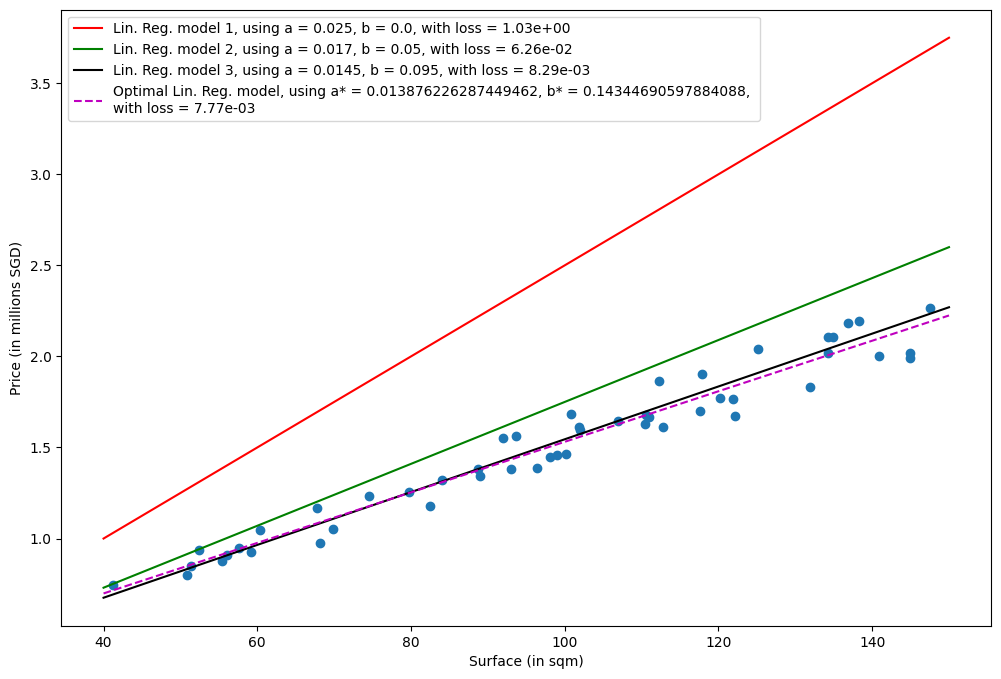

In [17]:
# Display dataset
plt.figure(figsize = (12, 8))
plt.scatter(inputs, outputs)
plt.xlabel("Surface (in sqm)")
plt.ylabel("Price (in millions SGD)")

# Add some linreg (model 1)
a1 = 25000/1000000
b1 = 0/1000000
linreg_dataset1 = linreg(a1, b1, min_surf, max_surf, n_points)
loss1 = loss_mse(a1, b1, inputs, outputs)
legend1 = "Lin. Reg. model 1, using a = {}, b = {}, with loss = {}".format(a1, b1, loss1)
plt.plot(get_x_list(linreg_dataset1), get_y_list(linreg_dataset1), 'r', label = legend1)

# Another linreg (model 2)
a2 = 17000/1000000
b2 = 50000/1000000
linreg_dataset2 = linreg(a2, b2, min_surf, max_surf, n_points)
loss2 = loss_mse(a2, b2, inputs, outputs)
legend2 = "Lin. Reg. model 2, using a = {}, b = {}, with loss = {}".format(a2, b2, loss2)
plt.plot(get_x_list(linreg_dataset2), get_y_list(linreg_dataset2), 'g', label = legend2)

# A final linreg (model 3)
a3 = 14500/1000000
b3 = 95000/1000000
linreg_dataset3 = linreg(a3, b3, min_surf, max_surf, n_points)
loss3 = loss_mse(a3, b3, inputs, outputs)
legend3 = "Lin. Reg. model 3, using a = {}, b = {}, with loss = {}".format(a3, b3, loss3)
plt.plot(get_x_list(linreg_dataset3), get_y_list(linreg_dataset3), 'k', label = legend3)

# Optimal linreg (calculated using the W_star formula)
linreg_dataset4 = linreg(a_star, b_star, min_surf, max_surf, n_points)
loss4 = loss_mse(a_star, b_star, inputs, outputs)
legend4 = "Optimal Lin. Reg. model, using a* = {}, b* = {}, \nwith loss = {}".format(a_star, b_star, loss4)
plt.plot(get_x_list(linreg_dataset4), get_y_list(linreg_dataset4), 'm--', label = legend4)

# Display
plt.legend(loc = 'best')
plt.show()

### What's next?

In the next notebook, we will discuss how to implement a gradient descent to solve the linear regression problem.